# Exploring Wind plotting options in Magics

This notebook will help you explore ways to plot wind arrows or flags on your maps in Magics.

At ECMWF  

From your workstation:
--------------

load python3  
module swap (or load) Magics/new   
jupyter notebook  

load this notebook



**Mwind** controls how wind is plotted on our maps. Here we can set things like display type, position, width, height, title and many more things.  
List of all **mwind** parameters you can find [in Magics++ documentation](https://confluence.ecmwf.int/display/MAGP/Wind+Plotting "Wind parameters").


### Import Magics and define non Wind paramters

For start let's import Magics and define some **none wind** parameters. We will try not to change these much in the rest of the notebook.

Sometimes on the edges of the map wind arrow or flags can partially be outside of map area. To prevent this from happening we should set mmap parameter **subpage_clipping** to **"on"**.

In [15]:
import Magics.macro as magics
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"  # this command enables us to plot more images at once

projection = magics.mmap(
    subpage_clipping               = "on",
    subpage_lower_left_latitude    = 35.,
    subpage_lower_left_longitude   = -20.,
    subpage_map_projection         = 'cylindrical',
    subpage_upper_right_latitude   = 70.,
    subpage_upper_right_longitude  = 40.
) 

australia = magics.mmap(
    subpage_upper_right_longitude= 180.,
    subpage_upper_right_latitude = -5.,
    subpage_lower_left_longitude = 105.,
    subpage_clipping             = 'on',
    subpage_map_projection       = "cylindrical",
    subpage_lower_left_latitude  = -55.)

light_background = magics.mcoast(map_coastline_sea_shade_colour= 'white',
                     map_coastline_land_shade_colour= 'cream',
                     map_grid= 'off',
                     map_coastline_land_shade= 'on',
                     map_coastline_sea_shade= 'on',
                     map_label= 'off',
                     map_coastline_colour= 'tan')

black_background = magics.mcoast(
    map_coastline_sea_shade         =   "on",
    map_coastline_land_shade_colour = "black",
    map_grid                        = "on",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "white",
    map_coastline_land_shade        = "on",
    map_coastline_sea_shade_colour  = "rgb(0.15,0.15,0.15)",
    map_label                       = "on",
    map_coastline_colour            = "tan")

legend = magics.mlegend(
    legend_display_type   = "continuous",
    legend_box_mode       = "automatic",
    legend_box_y_position = 17.00,
    legend_box_x_length   = 32.0,
    legend_box_y_length   = 1.50,
    legend_text_colour    = "charcoal",
    legend_text_font_size = "0.4"
)

### Load wind data

Lets first load wind data we will be using in this notebook.

We can use **mnetcdf** to load NetCDF data, and **mgrib** to load grib data. 

**mnetcdf**   
We need to give magics names of the variables that are x and y component of wind and if we want to colour the arrows by some other parameter than speed then we need to specify that parameter too. 

**mgrib**  
When plotting grib data we need to give magics indexes of x and y wind component, as well as index of parameter used for colouring the arrows (or flags).

In this case we will colour arrows by temperature in one of next few cells, to show is warm or cold air advected.

In [16]:
wind_from_nc = magics.mnetcdf(
    netcdf_filename                  = 'coloured_wind.nc',
    netcdf_level_dimension_setting   = "850",
    netcdf_x_component_variable      = "u",
    netcdf_y_component_variable      = "v",
    netcdf_colour_component_variable = "t",
    netcdf_time_dimension_setting    = "2017-01-13 12:00:00"
    )

wind_with_t = magics.mgrib(
    grib_input_file_name = 'tuv.grib', 
    grib_wind_position_1 = 1,
    grib_wind_position_2 = 2,
    grib_wind_position_colour=3)

wind_from_grib = magics.mgrib(
    grib_input_file_name = 'uv200.grib', 
    grib_wind_position_1 = 1,
    grib_wind_position_2 = 2)

### Simple wind arrows plotting

Wind is by default presented by blue arrows. Default thinning factor is 2, but if our data is on too dense grid, it might not be enough thinning that we actually see any information if the arrows are too long. 

If we want every gridpoint to be presented on the map we need to set **wind_thinning_factor** to **1**.

We can customize many things including colour of the arrows, shape and size of head of the arrows, threshold value for ploting etc.

When plotting arrows, paramter **wind_arrow_calm_indicator** is by default off.

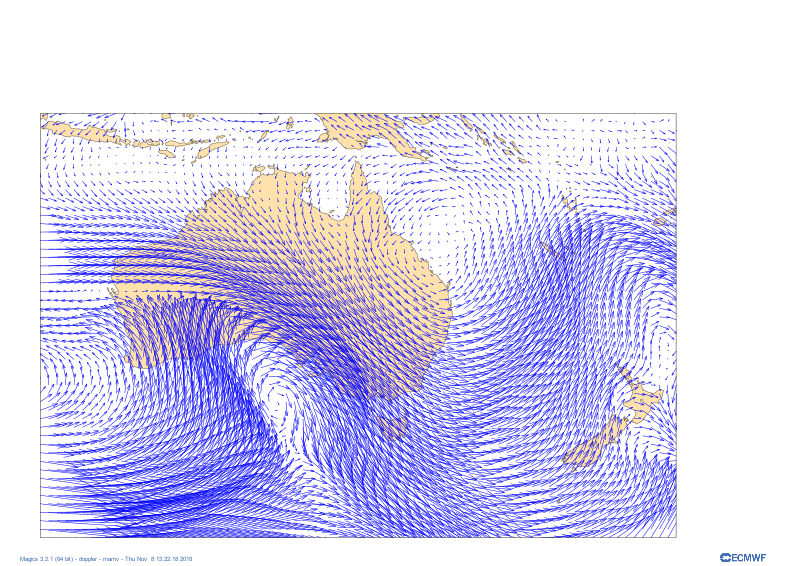

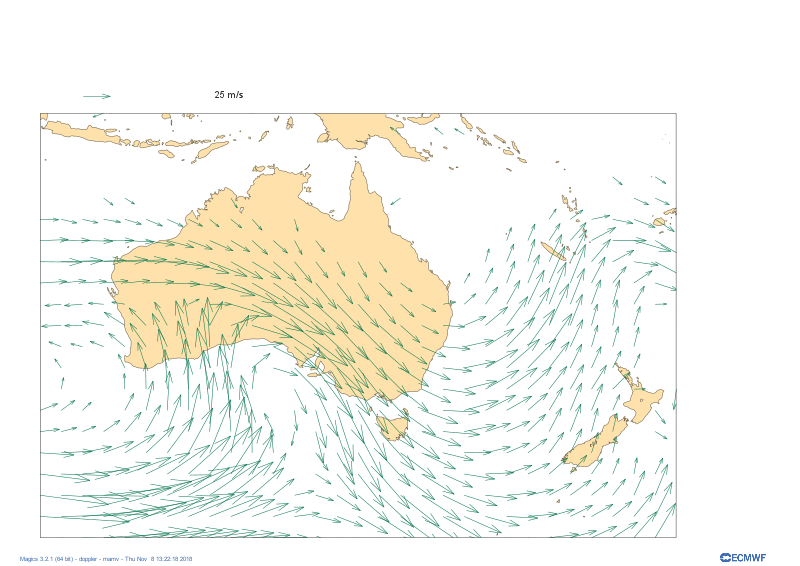

In [17]:
wind_arrows = magics.mwind(
    legend= 'on',
    wind_field_type= 'arrows',
    wind_arrow_thickness= 1,
    wind_thinning_factor= 5.,
    wind_arrow_calm_below = 10,
    wind_arrow_colour= 'evergreen' )

# Default wind plotting - blue lines
magics.plot(australia, light_background, wind_from_grib, magics.mwind(), legend)
# Wind arrows simple plotting
magics.plot(australia, light_background, wind_from_grib, wind_arrows, legend)

### Simple wind flags plotting

Another way to present wind is by using wind flags. We can choose not to show flag if wind speed is below our treshold, but to also mark grid point with a circle using **wind_flag_calm_below** parameter.

When plotting flags, paramter **wind_arrow_calm_indicator** is by default on.

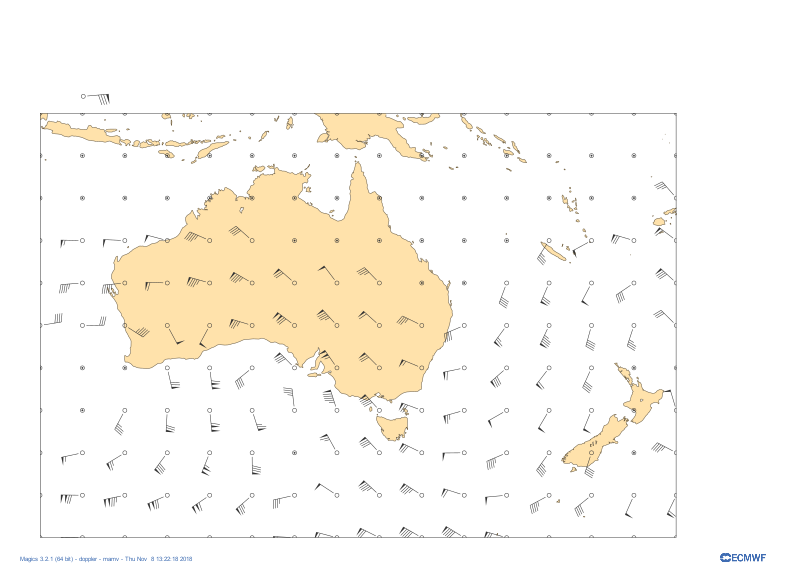

In [18]:
wind_flags = magics.mwind(
    legend= 'on',
    wind_field_type = 'flags',
    wind_flag_length = 0.8,
    wind_thinning_factor= 10.,
    wind_flag_calm_below = 15,
    wind_flag_origin_marker = "circle",
    wind_flag_colour = 'charcoal')

magics.plot(australia, light_background, wind_from_grib, wind_flags, legend)

### Coloured wind

Simple way to colour wind is by intensity and it is a default method in Magics. We will use advanced wind plotting method, by setting **wind_advanced_method** to **"on"** and then define colours and levels similar to setting contours.

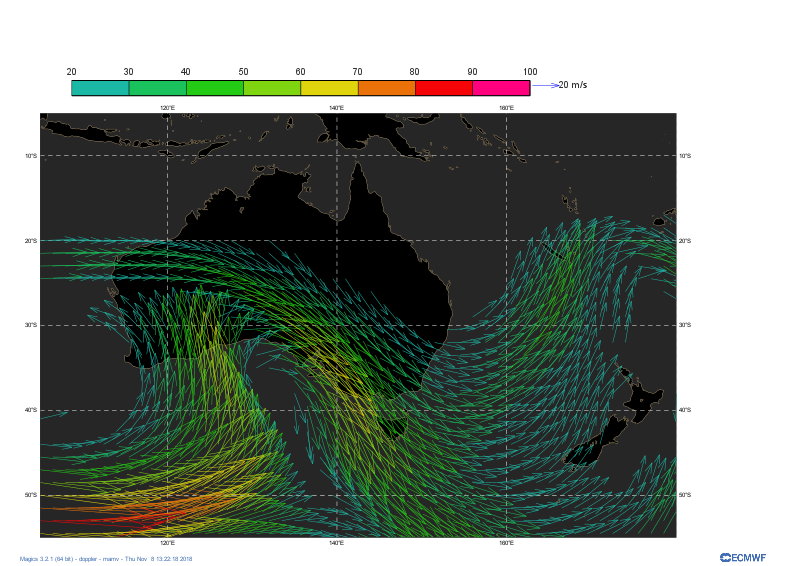

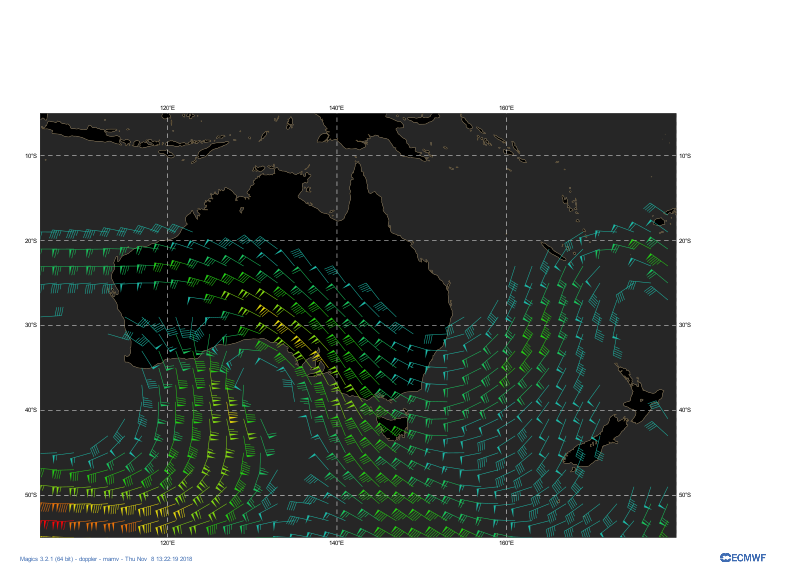

In [19]:
coloured_wind = magics.mwind(
    legend= 'on',
    wind_field_type = 'arrows',
    wind_arrow_unit_velocity = 20.0,
    wind_arrow_min_speed = 10.0,                
    wind_thinning_factor= 3.,
    wind_advanced_method = 'on',
    wind_advanced_colour_selection_type = 'interval',
    wind_advanced_colour_level_interval = 10.0,
    wind_advanced_colour_reference_level = 20.0,
    wind_advanced_colour_max_value = 100.0,
    wind_advanced_colour_min_value = 20.0,
    wind_advanced_colour_table_colour_method = 'calculate',
    wind_advanced_colour_direction = 'clockwise',
    wind_advanced_colour_min_level_colour = 'turquoise',
    wind_advanced_colour_max_level_colour = 'purple_red')

coloured_flags = magics.mwind(
    legend= 'off',
    wind_field_type = 'flags',
    wind_flag_origin_marker = 'off',
    wind_flag_length = 0.8,
    wind_flag_min_speed = 10.0,                
    wind_thinning_factor= 4.,
    wind_advanced_method = 'on',
    wind_advanced_colour_selection_type = 'interval',
    wind_advanced_colour_level_interval = 10.0,
    wind_advanced_colour_reference_level = 20.0,
    wind_advanced_colour_max_value = 100.0,
    wind_advanced_colour_min_value = 20.0,
    wind_advanced_colour_table_colour_method = 'calculate',
    wind_advanced_colour_direction = 'clockwise',
    wind_advanced_colour_min_level_colour = 'turquoise',
    wind_advanced_colour_max_level_colour = 'purple_red')

magics.plot(australia, black_background, wind_from_grib, coloured_wind, legend)
magics.plot(australia, black_background, wind_from_grib, coloured_flags, legend)

### Wind coloured by temperature

We can colour our wind arrows by speed or some other parameter. One way of showing temperature advection is by colouring wind arrows by temperature. If **wind_advanced_colour_parameter** is set to **"parameter"**, then Magics will use parameter that was given by **mnetcdf** or **mgrib**.

Since we have loaded both netcdf and grib file lets plot them both.

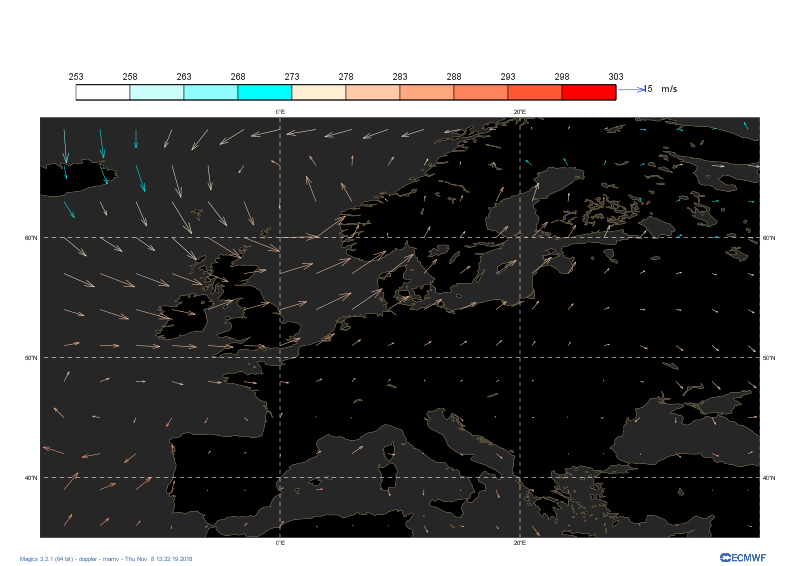

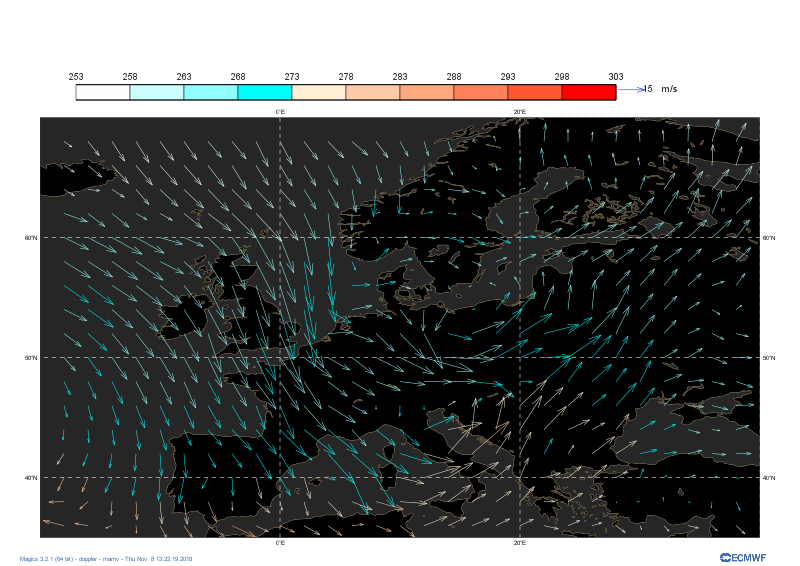

In [20]:
my_wind = magics.mwind(
    wind_field_type                          = "arrows",
    wind_arrow_unit_velocity                 = 15,
    legend                                   = "on",
    wind_advanced_method                     = "on",
    wind_advanced_colour_parameter           = "parameter",
    wind_advanced_colour_selection_type      = "list",
    wind_advanced_colour_table_colour_method = "list",
    wind_advanced_colour_list                = ['#ffffff','#ceffff','#91ffff','#00ffff','#ffefd5',
                                                '#ffccab','#ffa981','#ff835a','#ff5832','#ff0000'],
    wind_advanced_colour_level_list          = [253.,258.,263.,268.,273.,278.,283.,288.,293.,298.,303.],
    wind_arrow_thickness                     = 1,
    wind_arrow_legend_text                   = "  m/s"
    )

magics.plot(projection, black_background, wind_with_t, my_wind, legend)
magics.plot(projection, black_background, wind_from_nc, my_wind, legend)
